In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import math
# set plot parameters
plt.rcParams['figure.figsize'] = [30,20]
plt.rcParams.update({'font.size': 50})
plt.style.use('ggplot')

In [24]:
#condition = pd.read_csv('OMOP2OBO_V1_Condition_Occurrence_Mapping_Oct2020_filter.csv')
condition = pd.read_csv('Condition_Occurrence_Mapping_processed.csv')

In [25]:
person = pd.read_csv('person.csv')
#person['SUM'].max()
personsort = person.sort_values(by='SUM',ascending=False)
#print(personsort.shape)
more100 = person[person['SUM'] > 100]
person

,PERSON_ID,SUM
0,29394,9
1,29750,11
2,31166,13
3,66656,19
4,69790,13
...,...,...
1123037,807578,4
1123038,808802,27
1123039,809192,15
1123040,900274,10


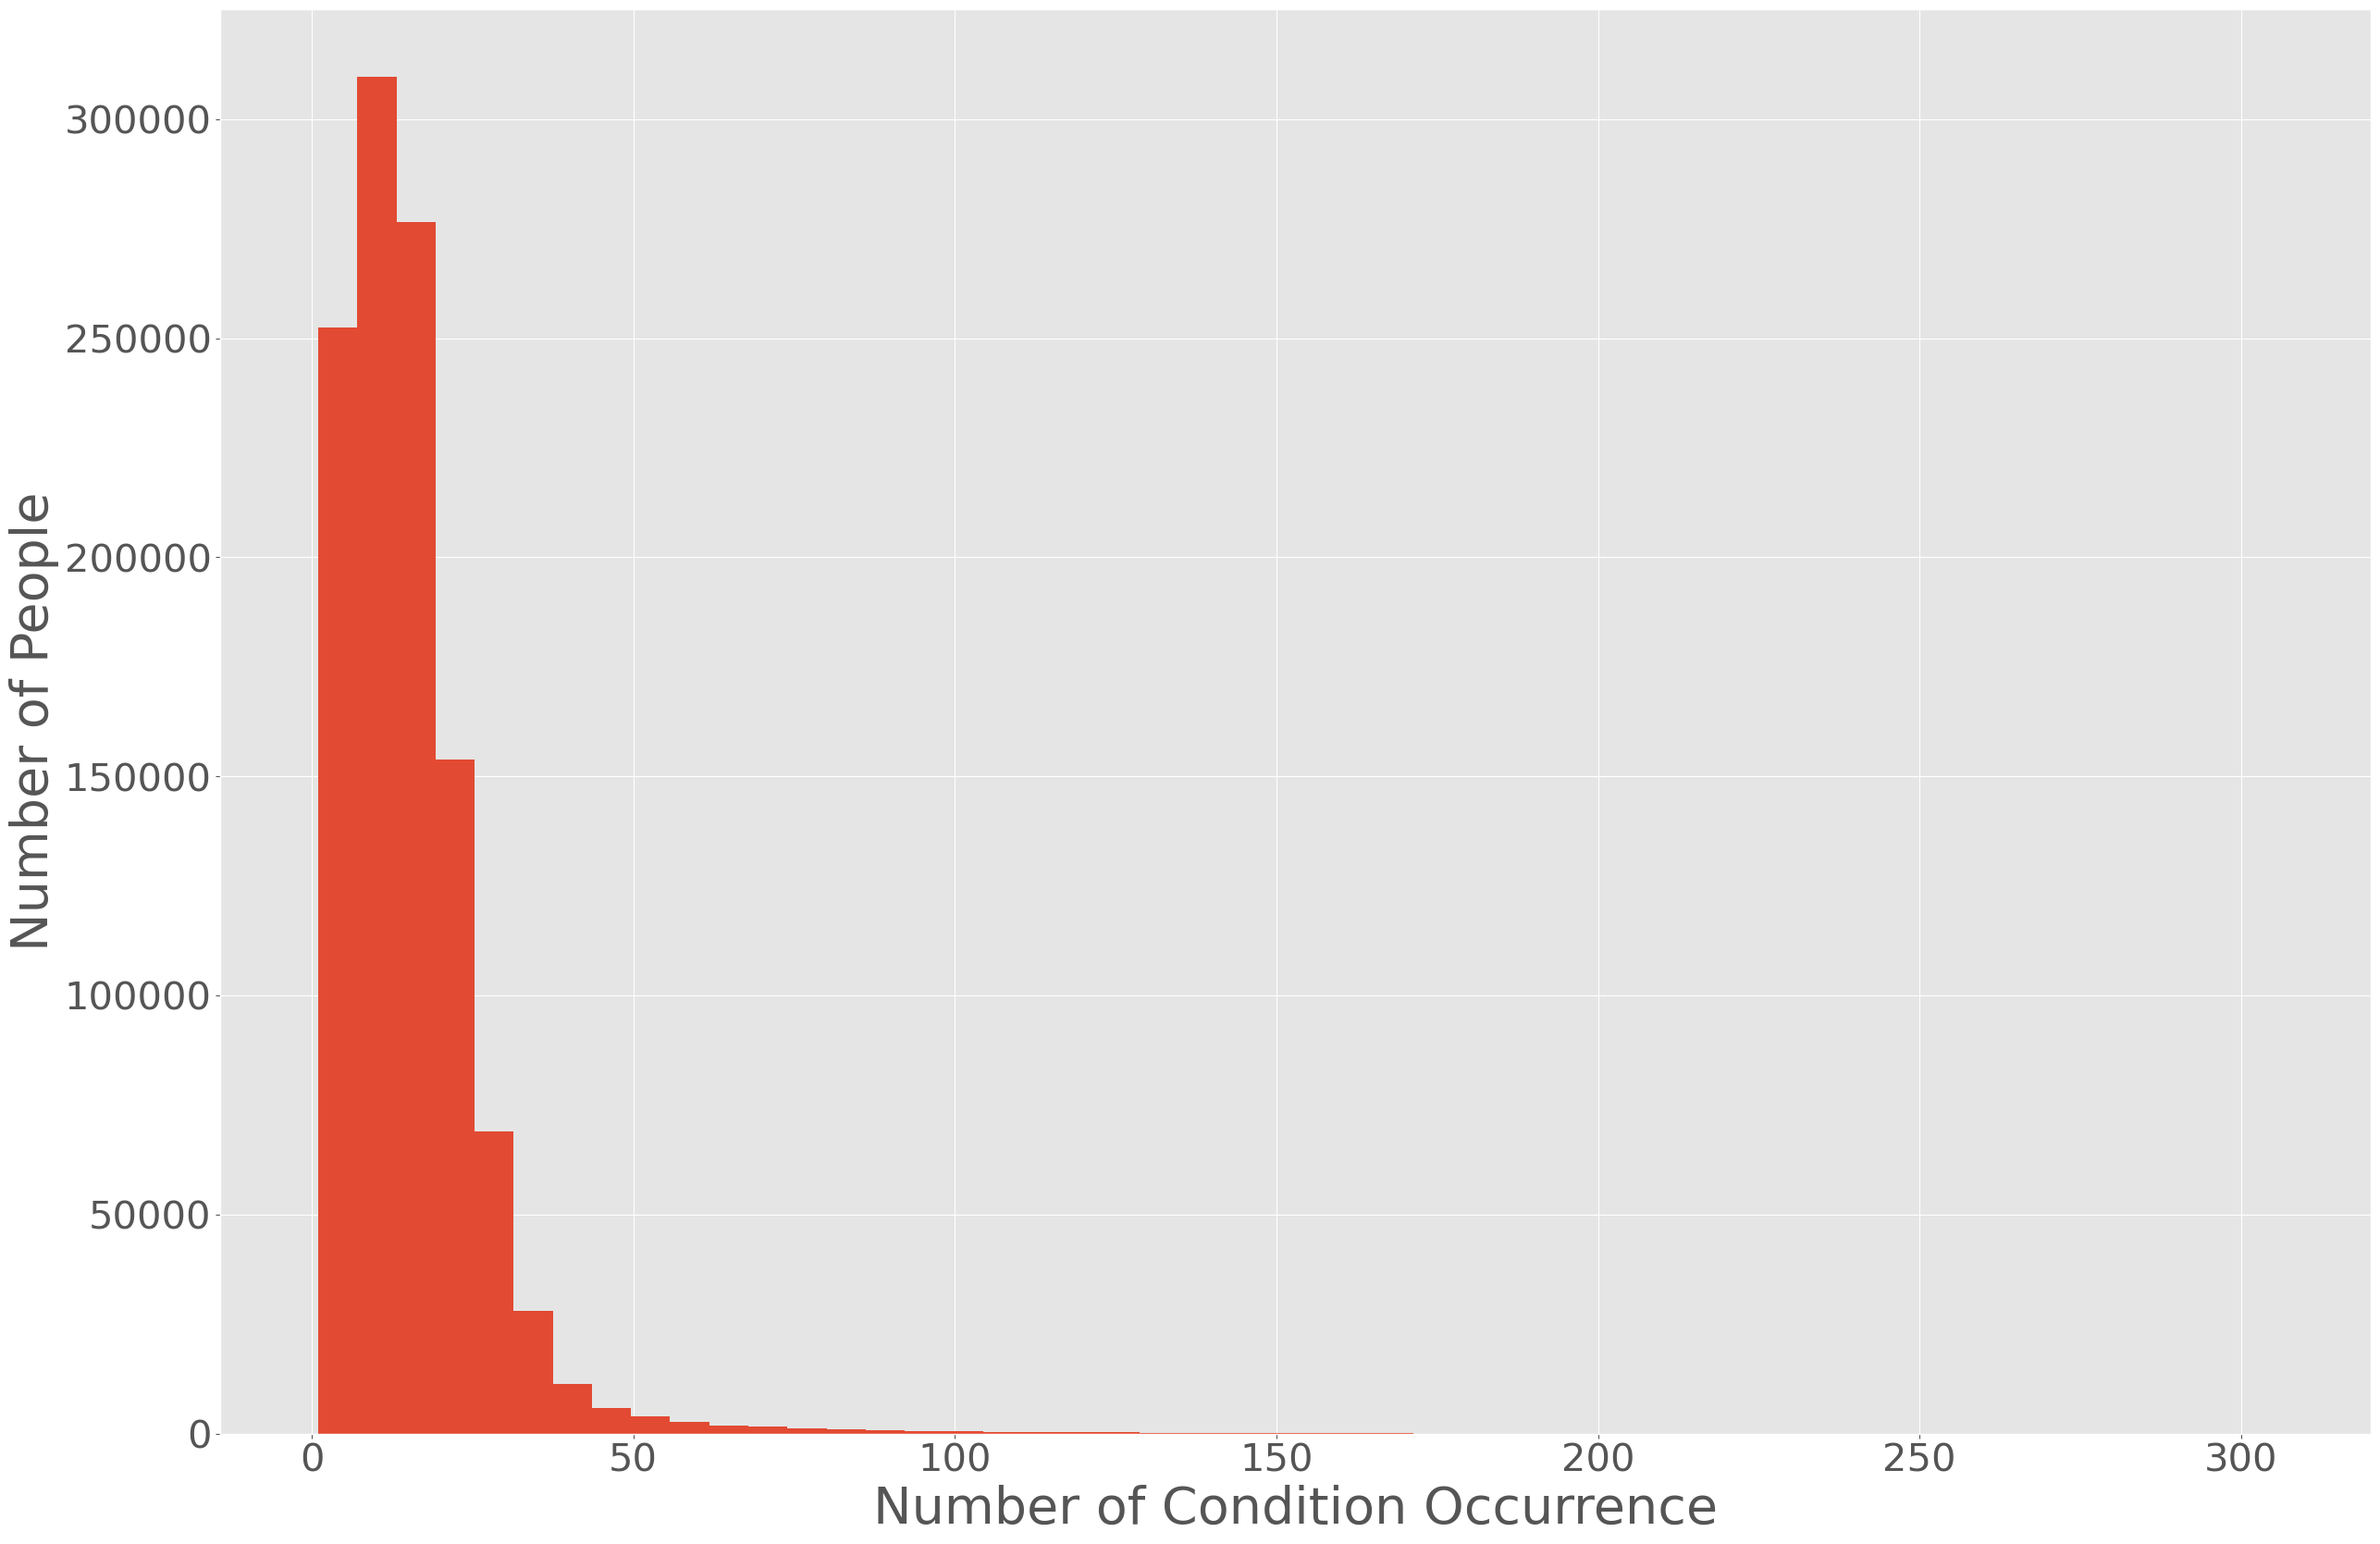

In [26]:
fig, ax = plt.subplots()
ax.hist(person['SUM'],bins=50)
#fig.suptitle('test title')
plt.xlabel('Number of Condition Occurrence',fontsize=40)
plt.ylabel('Number of People',fontsize=40)


ax.tick_params(axis='both', labelsize=30)

plt.show()

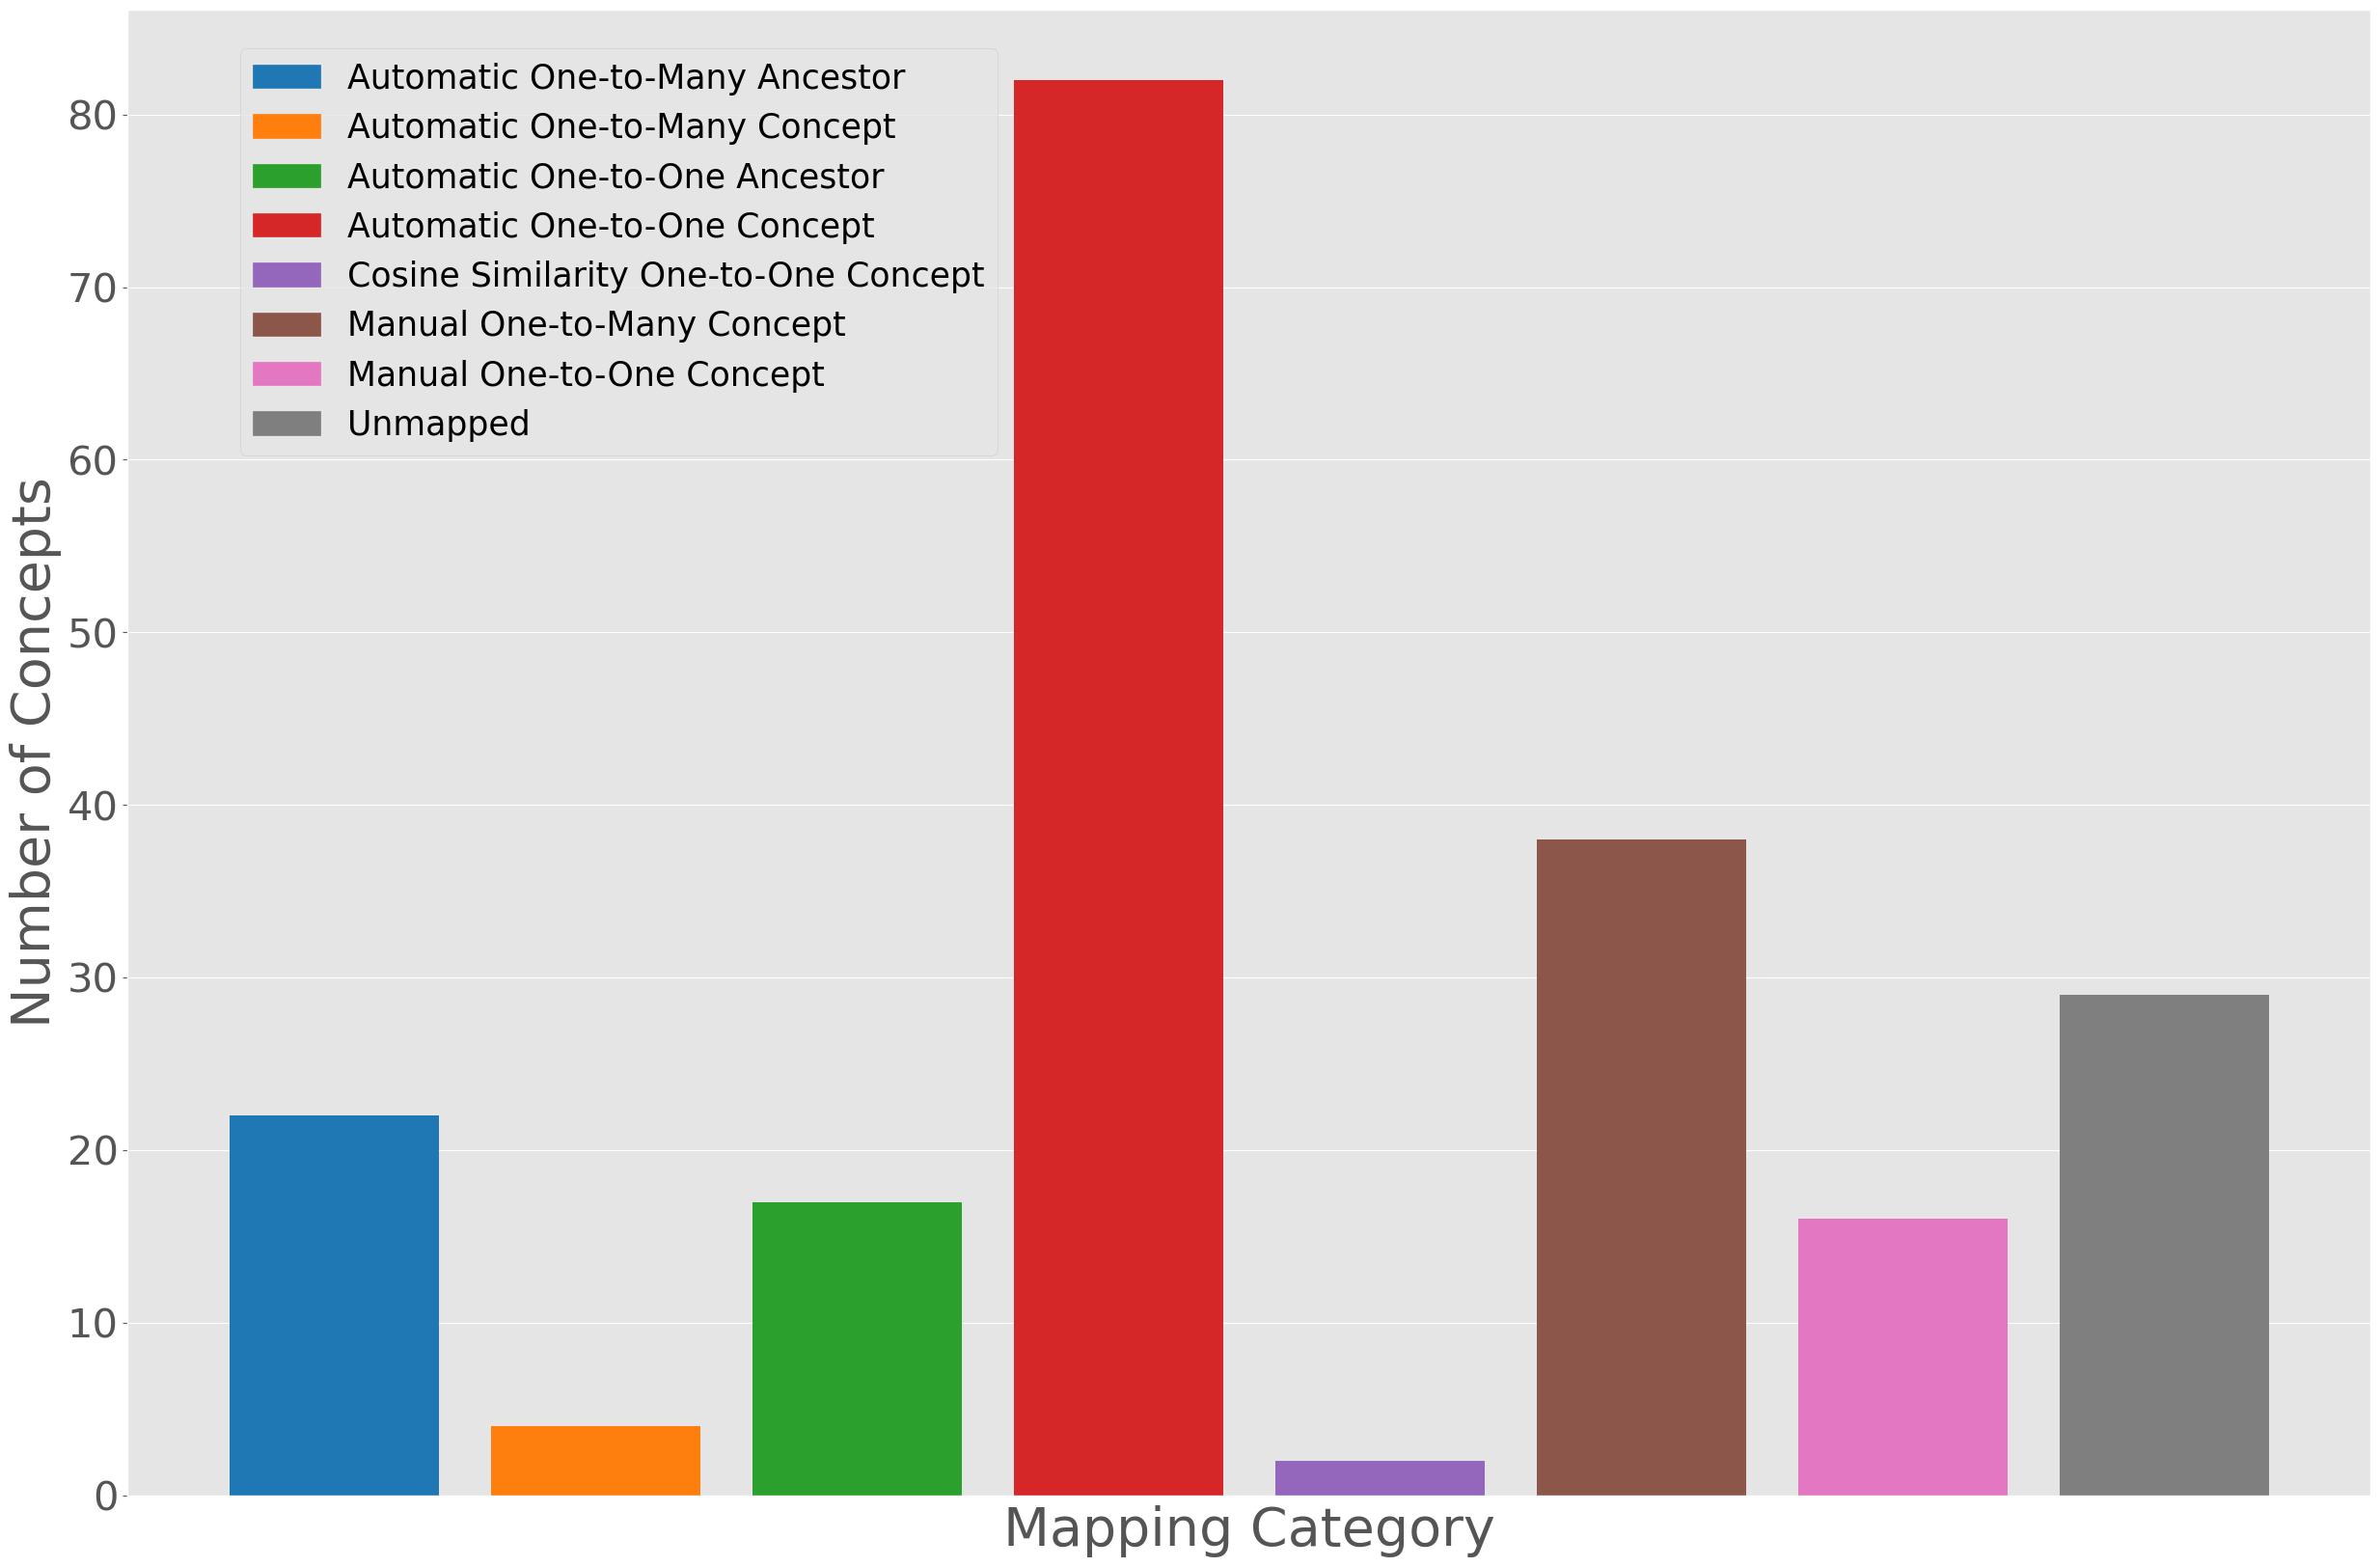

In [27]:
mapcat = condition.groupby(['MAPPING_CATEGORY']).count().iloc[:,:1]
mapcat['MAPPING_CATEGORY']= mapcat.index.values
maplabel = mapcat['MAPPING_CATEGORY'].tolist()

# barplot number of mapping categories 
fig, ax = plt.subplots()

c = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2',
 '#7f7f7f', '#bcbd22', '#17becf']

patch_list = []
i = 0
for label in maplabel:
    patch_list.append(mpatches.Patch(label=label, color=c[i]))
    i += 1
    
ax.bar(mapcat['MAPPING_CATEGORY'],mapcat['CONCEPT_ID'],color=c)

plt.legend(handles=patch_list, fontsize=25, loc=(0.05, 0.7))

plt.xticks([])
ax.tick_params(axis='y', labelsize=30)

#fig.suptitle('test title')
plt.xlabel('Mapping Category',fontsize=40)
plt.ylabel('Number of Concepts',fontsize=40)

plt.show()

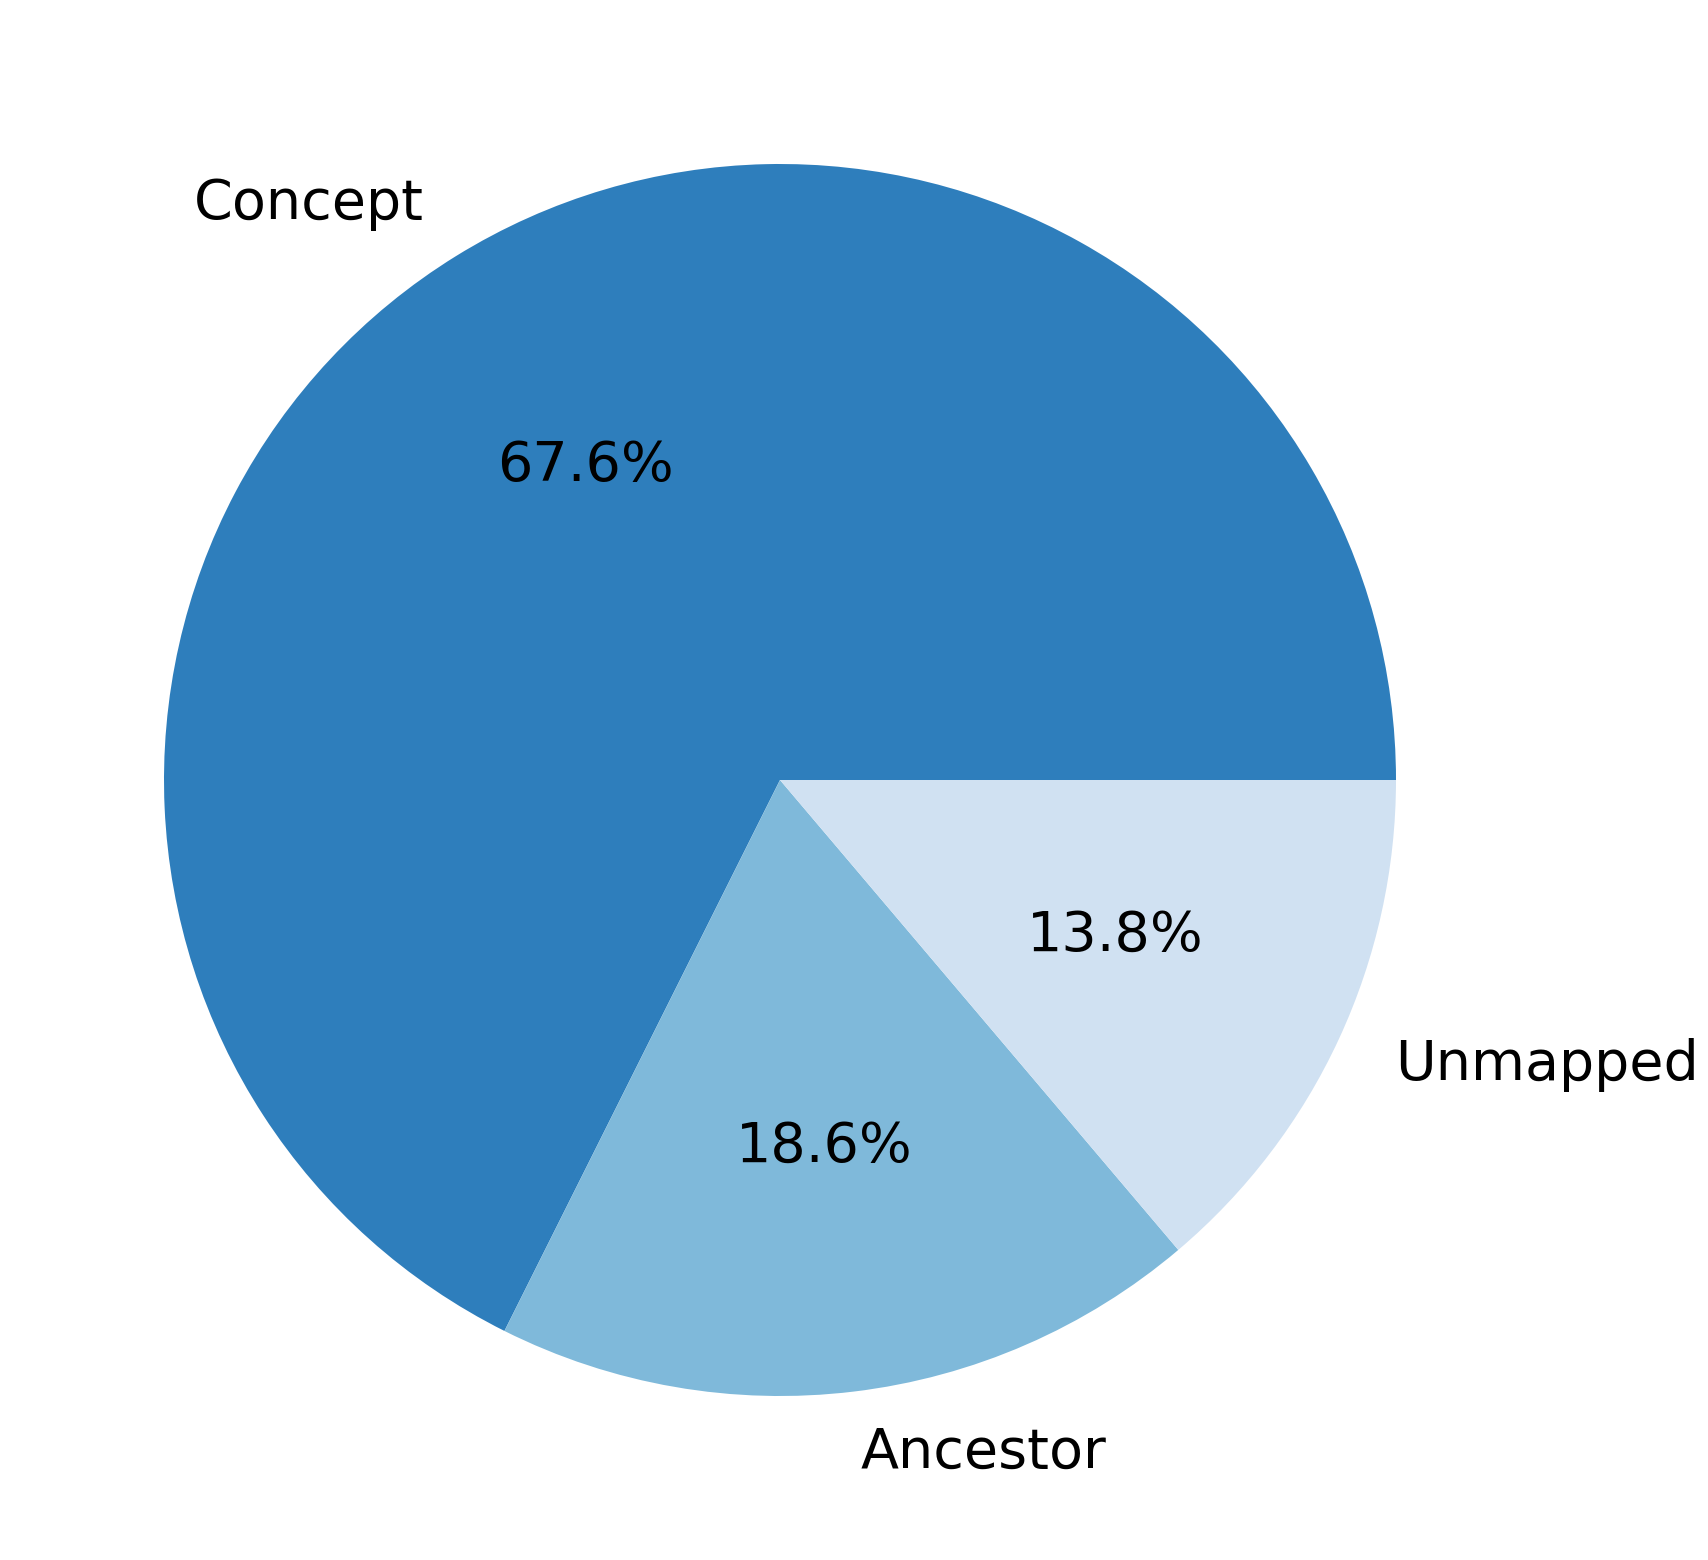

In [32]:
num_concept = mapcat.loc[mapcat['MAPPING_CATEGORY'].str.contains("Concept"),'CONCEPT_ID'].sum()
num_ancestor = mapcat.loc[mapcat['MAPPING_CATEGORY'].str.contains("Ancestor"),'CONCEPT_ID'].sum()
num_unmapped = mapcat.loc[mapcat['MAPPING_CATEGORY'] == 'Unmapped','CONCEPT_ID'].sum()
count = np.array([num_concept,num_ancestor,num_unmapped])
labels = ['Concept','Ancestor','Unmapped']

colors = plt.get_cmap('Blues')(np.linspace(0.7, 0.2, len(count)))
plt.pie(count,labels = labels,colors =colors,autopct='%1.1f%%',textprops={'fontsize': 40})
plt.show()

In [8]:
measurement = pd.read_csv('Measurement_Mapping_processed.csv')

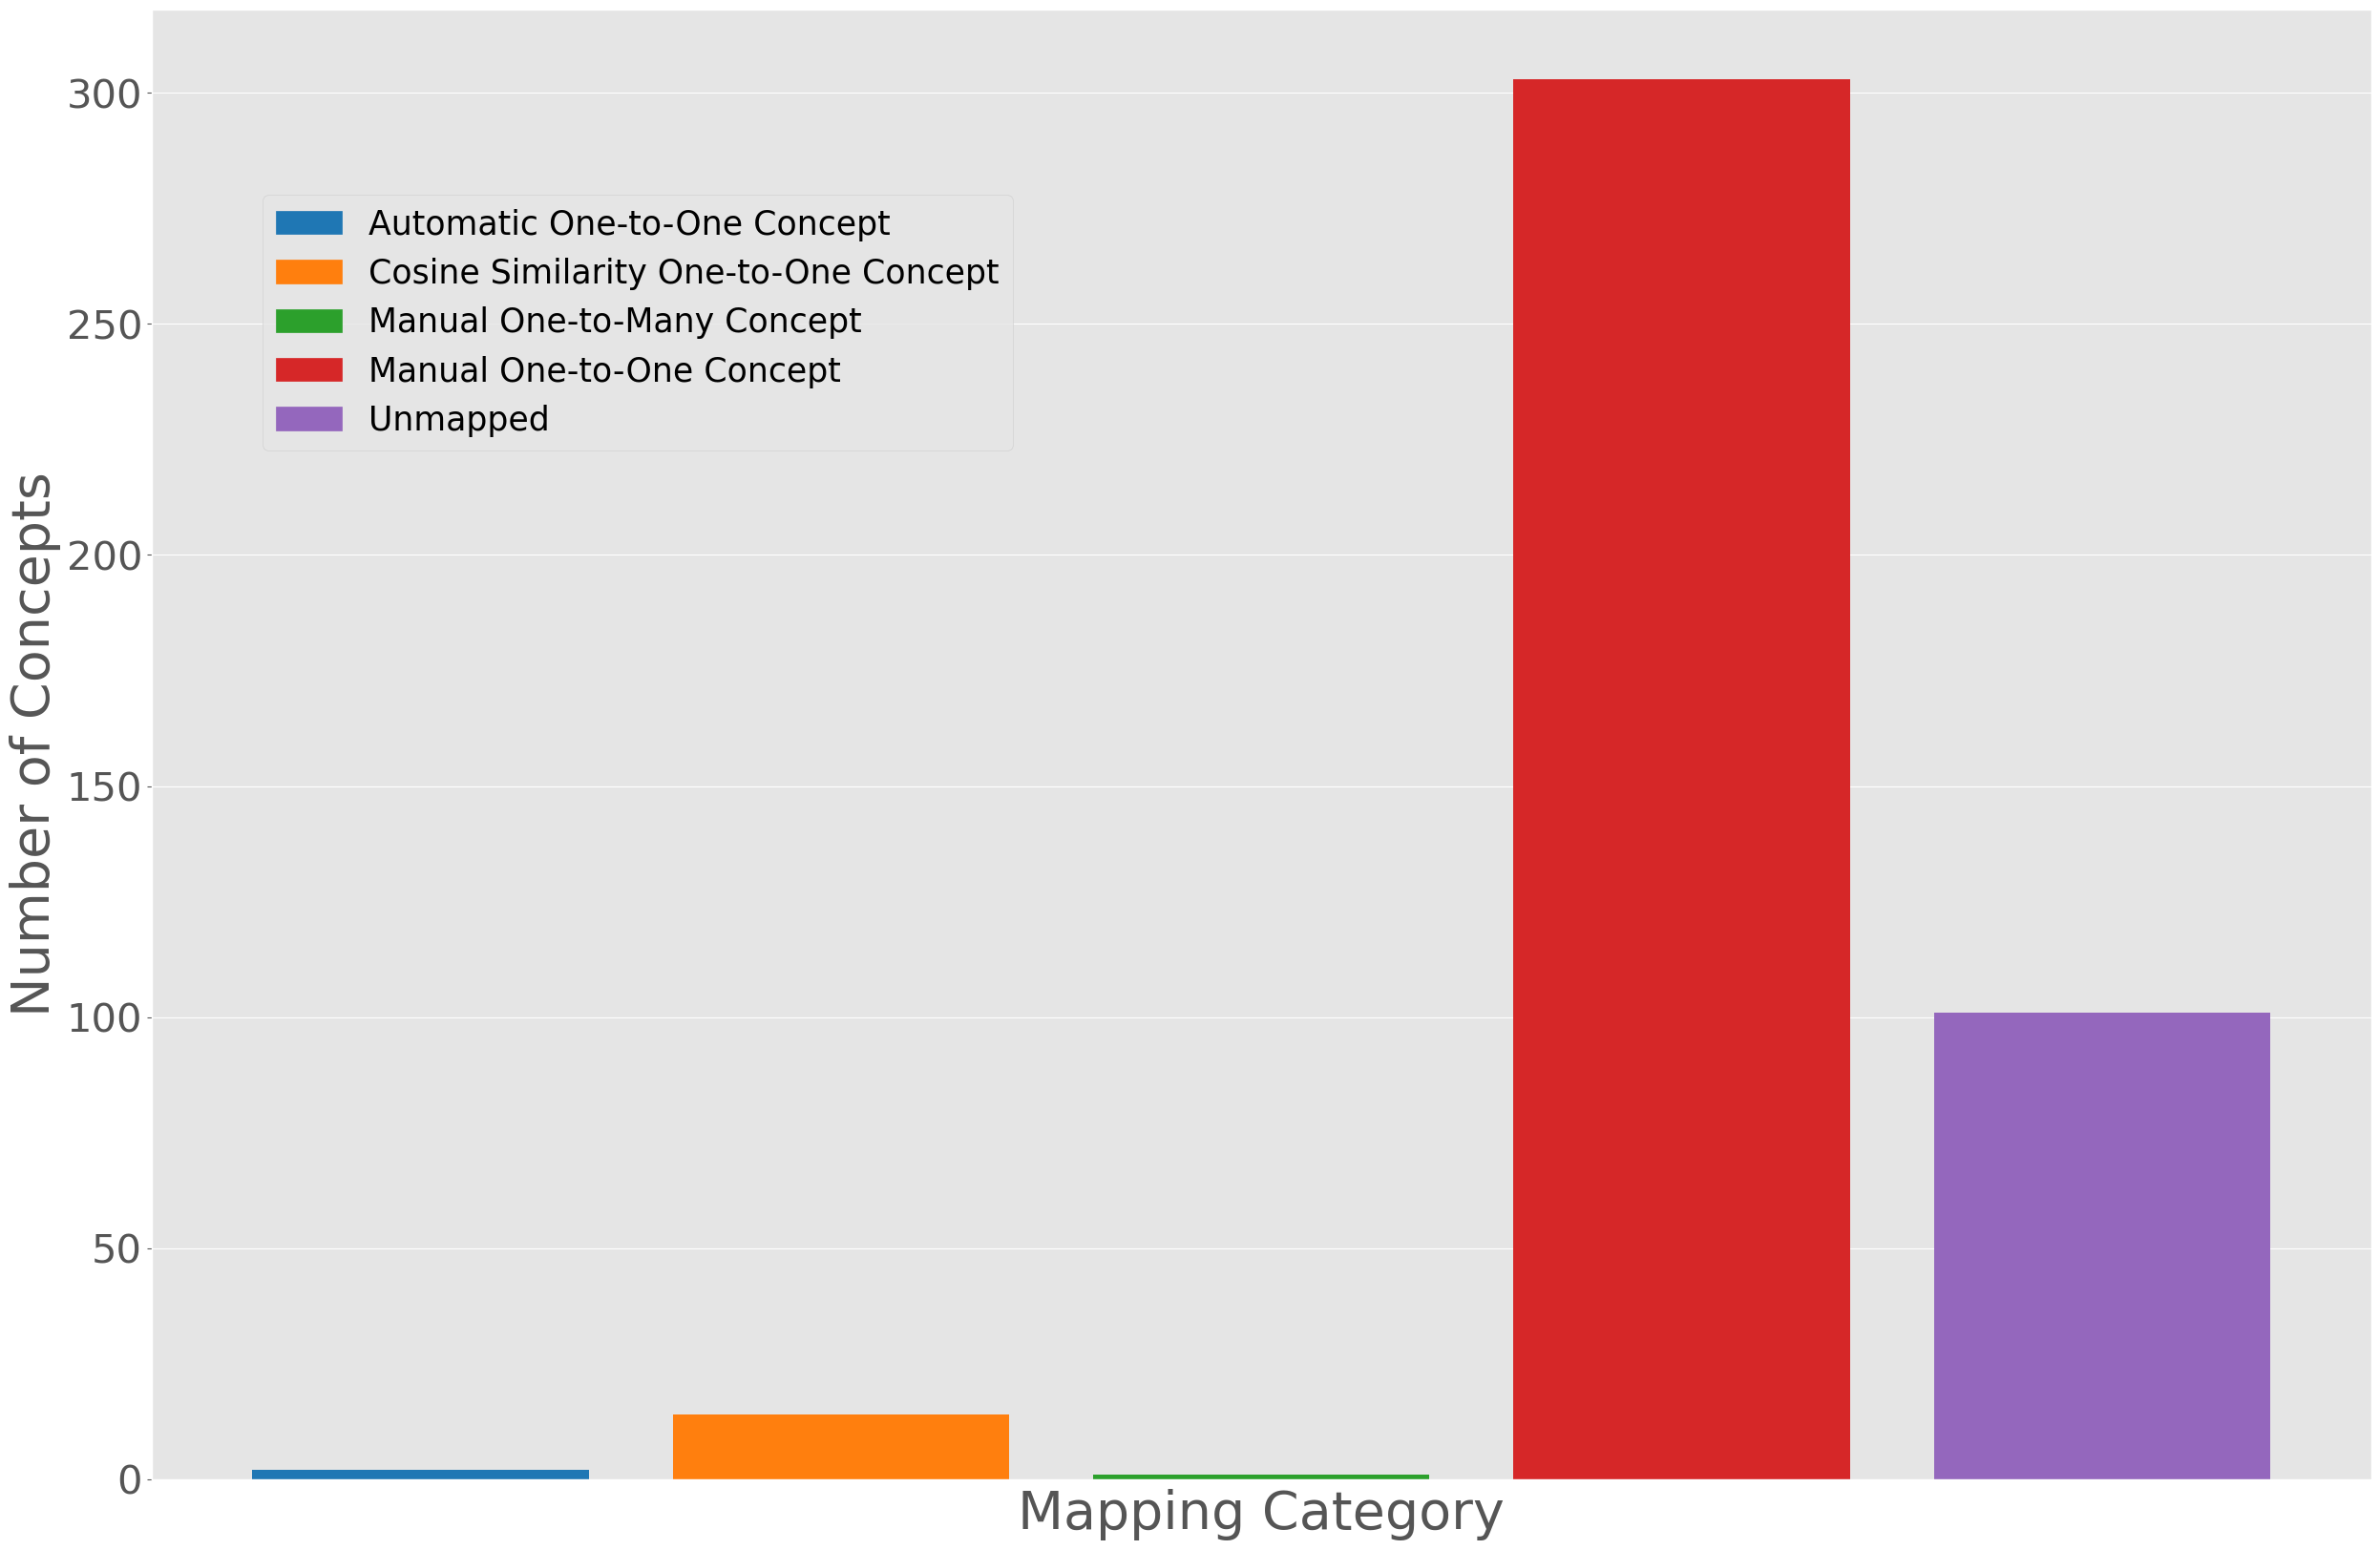

In [9]:
mapcat = measurement.groupby(['MAPPING_CATEGORY']).count().iloc[:,:1]
mapcat['MAPPING_CATEGORY']= mapcat.index.values
maplabel = mapcat['MAPPING_CATEGORY'].tolist()

# barplot number of mapping categories 
fig, ax = plt.subplots()

c = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2',
 '#7f7f7f', '#bcbd22', '#17becf']

patch_list = []
i = 0
for label in maplabel:
    patch_list.append(mpatches.Patch(label=label, color=c[i]))
    i += 1
    
ax.bar(mapcat['MAPPING_CATEGORY'],mapcat['CONCEPT_ID'],color=c)

plt.legend(handles=patch_list, fontsize=25, loc=(0.05, 0.7))

plt.xticks([])
ax.tick_params(axis='y', labelsize=30)

#fig.suptitle('test title')
plt.xlabel('Mapping Category',fontsize=40)
plt.ylabel('Number of Concepts',fontsize=40)

plt.show()

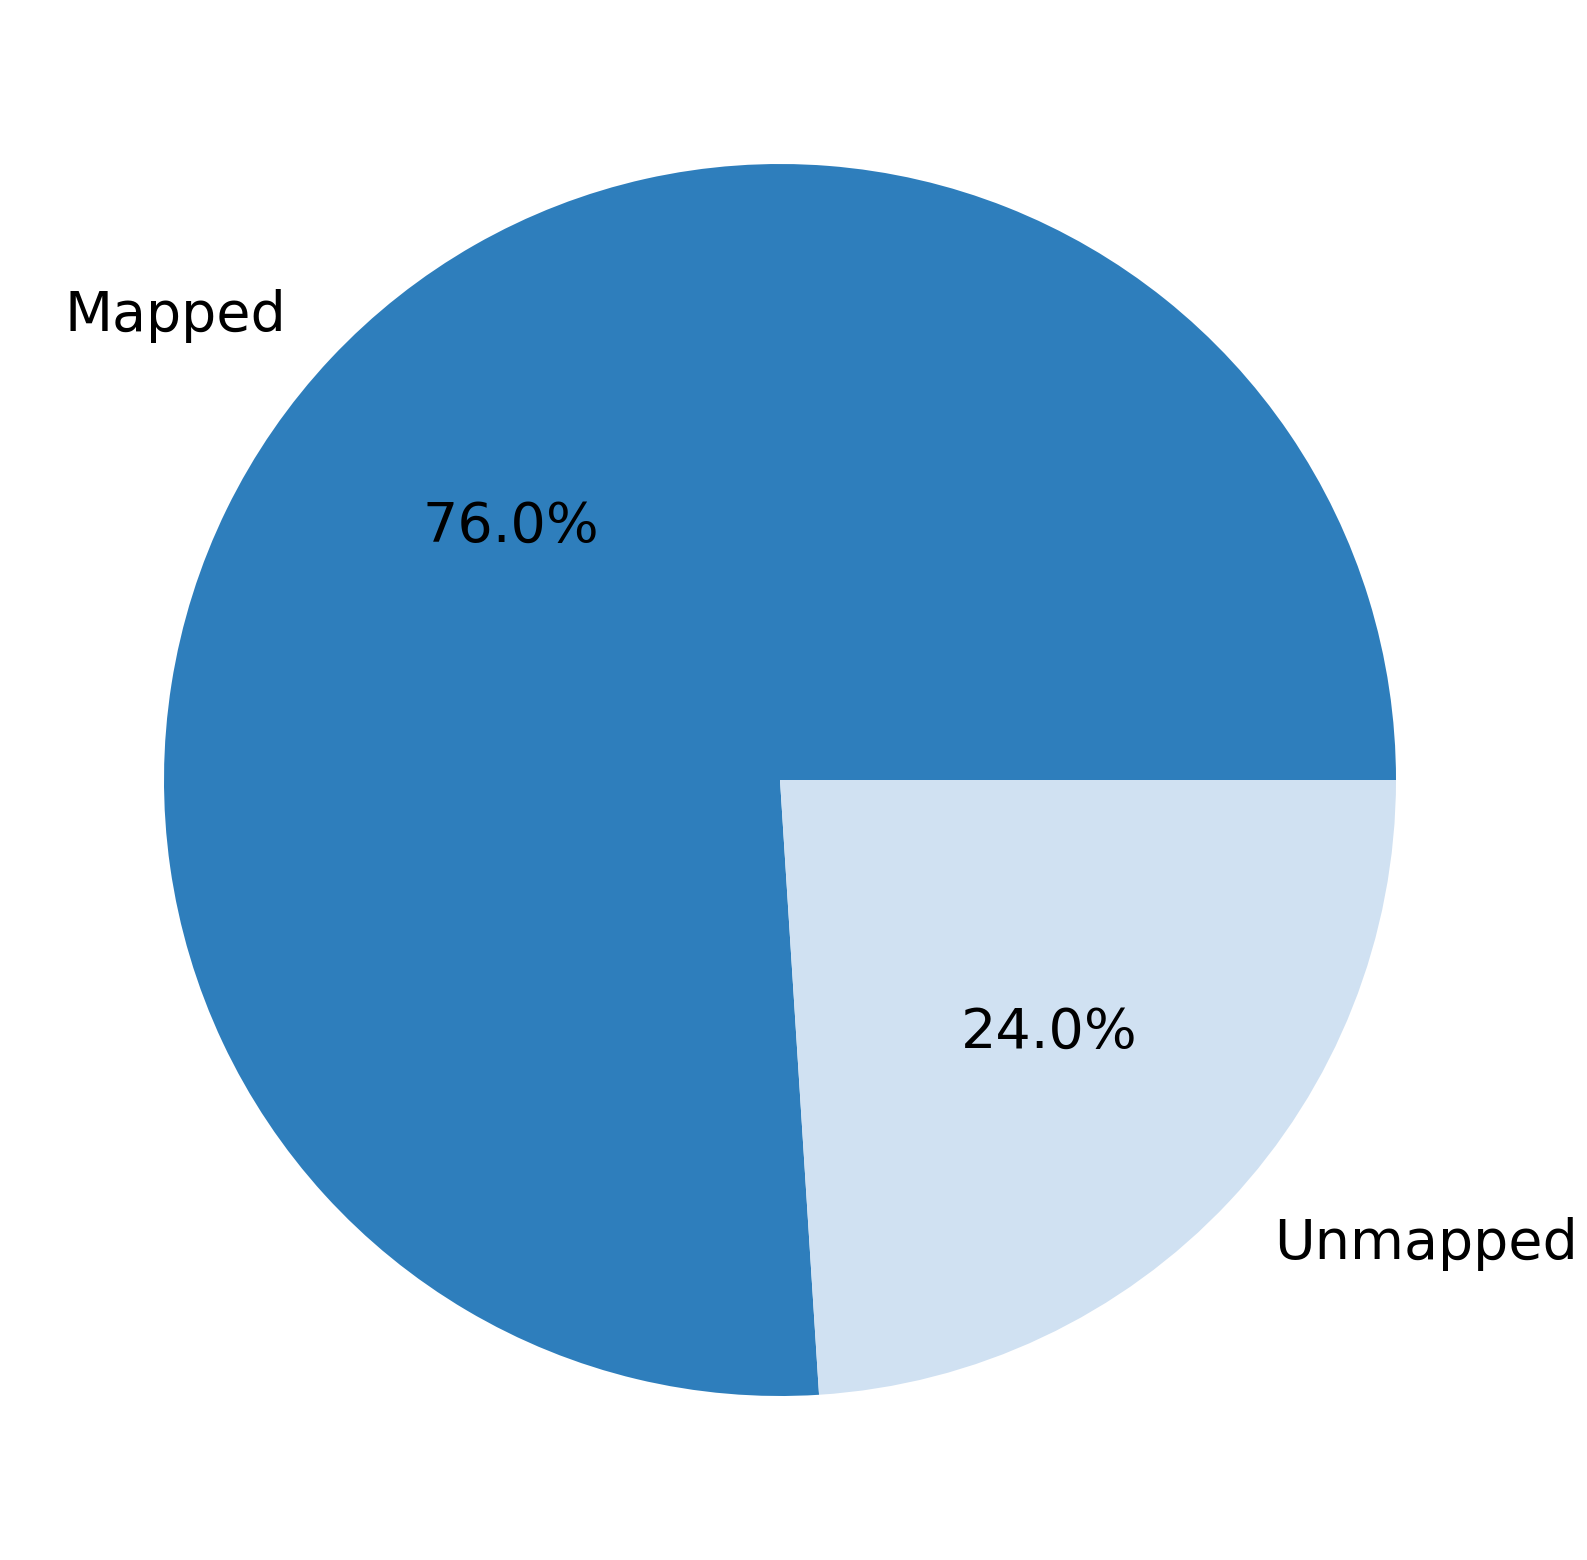

In [23]:
num_mapped = mapcat.loc[mapcat['MAPPING_CATEGORY'] != 'Unmapped','CONCEPT_ID'].sum()
num_unmapped = mapcat.loc[mapcat['MAPPING_CATEGORY'] == 'Unmapped','CONCEPT_ID'].sum()
count = np.array([num_mapped,num_unmapped])
labels = ['Mapped','Unmapped']



colors = plt.get_cmap('Blues')(np.linspace(0.7, 0.2, len(count)))
plt.pie(count,labels = labels,colors =colors,autopct='%1.1f%%',textprops={'fontsize': 40})
plt.show()